In [1]:
import pandas as pd 

data = pd.read_csv('Data/full_rnn_data_2.csv')
data.drop('Unnamed: 0', axis = 1, inplace= True)
data

C:\Users\domen\AppData\Local\Temp\ipykernel_12840\2725669544.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Data/full_rnn_data_2.csv')


,lastTradeDate,strike,price,bid,ask,change,percentChange,volume,openInterest,sigma,...,ticker_ZS,ticker_ZTO,ticker_ZTS,ticker_ZUMZ,ticker_ZUO,ticker_ZVIA,ticker_ZVRA,ticker_ZWS,ticker_ZYME,ticker_ZYXI
0,2024-07-23,70.0,0.18,137.05,137.12,0.0,0.0,1717668.0,2.0,0.263417,...,False,False,False,False,False,False,False,False,False,False
1,2024-07-23,70.0,0.18,137.05,137.12,0.0,0.0,1717668.0,2.0,0.263417,...,False,False,False,False,False,False,False,False,False,False
2,2024-05-02,85.0,0.10,137.05,137.12,0.0,0.0,1717668.0,16.0,0.263417,...,False,False,False,False,False,False,False,False,False,False
3,2024-05-02,85.0,0.10,137.05,137.12,0.0,0.0,1717668.0,16.0,0.263417,...,False,False,False,False,False,False,False,False,False,False
4,2024-05-02,85.0,0.10,137.05,137.12,0.0,0.0,1717668.0,16.0,0.263417,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278709,2024-05-15,17.5,0.35,8.90,8.96,0.0,0.0,1034596.0,109.0,0.599988,...,False,False,False,False,False,False,False,False,False,True
278710,2024-03-06,20.0,0.50,8.90,8.96,0.0,0.0,1034596.0,2.0,0.599988,...,False,False,False,False,False,False,False,False,False,True
278711,2024-03-06,20.0,0.50,8.90,8.96,0.0,0.0,1034596.0,2.0,0.599988,...,False,False,False,False,False,False,False,False,False,True
278712,2024-03-06,20.0,0.50,8.90,8.96,0.0,0.0,1034596.0,2.0,0.599988,...,False,False,False,False,False,False,False,False,False,True


In [2]:
data = data.replace({False: 0, True: 1})

In [3]:
data.drop('lastTradeDate', axis = 1, inplace= True)

In [4]:
rnn_data = data

rnn_call_data = rnn_data[rnn_data.call == 1]
rnn_put_data = rnn_data[rnn_data.call == 0]

rnn_call_data.drop('call', axis = 1, inplace = True)
rnn_put_data.drop('call', axis = 1, inplace = True)

C:\Users\domen\AppData\Local\Temp\ipykernel_12840\419533007.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rnn_call_data.drop('call', axis = 1, inplace = True)
C:\Users\domen\AppData\Local\Temp\ipykernel_12840\419533007.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rnn_put_data.drop('call', axis = 1, inplace = True)


In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

# Load your data
# rnn_call_data = pd.read_csv('your_data.csv')  # Uncomment and modify this line to load your data

# Separate features and target
y = rnn_call_data['price']
X = rnn_call_data.drop('price', axis=1)

# Handle categorical data by one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Remove rows with NaN values
X.dropna(inplace=True)
y = y[X.index]  # Keep the target values corresponding to the filtered features

# Convert to more memory-efficient data types
X = X.astype(np.float32)
y = y.astype(np.float32)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection (optional, adjust k based on your needs)
k = 1000  # Number of top features to keep
selector = SelectKBest(f_regression, k=k)
X_selected = selector.fit_transform(X_scaled, y)

print(f"Data shape after feature selection: {X_selected.shape}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.20, random_state=0)

# Reshape the data to 3D format for LSTM (samples, timesteps, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


Data shape after feature selection: (149092, 1000)


In [5]:


# Build RNN model
RNN_model = Sequential()
RNN_model.add(LSTM(400, input_shape=(1, X_train_reshaped.shape[2]), activation='relu', return_sequences=True))
RNN_model.add(LSTM(400, activation='relu', return_sequences=True))
RNN_model.add(LSTM(400, activation='relu', return_sequences=True))
RNN_model.add(LSTM(400, activation='relu', return_sequences=True))
RNN_model.add(LSTM(400, activation='relu'))
RNN_model.add(Dense(1))

# Compile the model with a lower learning rate and gradient clipping
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)
RNN_model.compile(loss='mean_squared_error', optimizer=optimizer)

# Train the RNN model
batch_size = 512  # Adjust based on memory constraints
RNN_model.fit(X_train_reshaped, y_train, epochs=40, batch_size=16, verbose=1)

# Evaluate the model
loss = RNN_model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss}")


Data shape after feature selection: (149092, 1000)

Epoch 1/40

7455/7455 [==============================] - 506s 67ms/step - loss: 820.9005
Epoch 2/40
7455/7455 [==============================] - 524s 70ms/step - loss: 575.1749
Epoch 3/40
7455/7455 [==============================] - 525s 70ms/step - loss: 410.0237
Epoch 4/40
7455/7455 [==============================] - 528s 71ms/step - loss: 277.6516
Epoch 5/40
7455/7455 [==============================] - 526s 71ms/step - loss: 221.6249
Epoch 6/40
7455/7455 [==============================] - 529s 71ms/step - loss: 197.2964
Epoch 7/40
7455/7455 [==============================] - 531s 71ms/step - loss: 154.7865
Epoch 8/40
7455/7455 [==============================] - 535s 72ms/step - loss: 146.3054
Epoch 9/40
7455/7455 [==============================] - 534s 72ms/step - loss: 139.6914
Epoch 10/40
7455/7455 [==============================] - 536s 72ms/step - loss: 119.0134
Epoch 11/40
7455/7455 [==============================] - 535s 72m

In [6]:
RNN_model.save('models\\rnn\RNN_model.keras')

#### PERFORMANCE FOR CALL MODEL

In [6]:
from keras.models import load_model

# Load the model
RNN_call = load_model('models\\rnn\\RNN_call.keras')

In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

# Load your data
# rnn_call_data = pd.read_csv('your_data.csv')  # Uncomment and modify this line to load your data

# Separate features and target
y = rnn_call_data['price']
X = rnn_call_data.drop('price', axis=1)

# Handle categorical data by one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Remove rows with NaN values
X.dropna(inplace=True)
y = y[X.index]  # Keep the target values corresponding to the filtered features

# Convert to more memory-efficient data types
X = X.astype(np.float32)
y = y.astype(np.float32)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection (optional, adjust k based on your needs)
k = 1000  # Number of top features to keep
selector = SelectKBest(f_regression, k=k)
X_selected = selector.fit_transform(X_scaled, y)

print(f"Data shape after feature selection: {X_selected.shape}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
    X_selected, y, np.arange(len(y)), test_size=0.20, random_state=0
)

# Reshape the data to 3D format for LSTM (samples, timesteps, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

Data shape after feature selection: (149092, 1000)


In [35]:
y_pred = RNN_call.predict(X_test_reshaped)


932/932 [==============================] - 6s 7ms/step


(29819, 1)

In [38]:
y_pred

array([[ 0.17764091],
       [ 0.68115044],
       [-0.20125008],
       ...,
       [ 1.0015316 ],
       [ 0.7527809 ],
       [ 2.3264408 ]], dtype=float32)

In [47]:
df = pd.DataFrame(y_test)
df['RNN'] = y_pred

In [48]:
df

,price,RNN
99022,0.55,0.177641
52523,0.04,0.681150
128944,0.10,-0.201250
254922,3.55,0.152907
24586,3.76,5.725178
...,...,...
1966,15.20,15.445639
13517,0.02,0.202341
4016,2.00,1.001532
243383,0.01,0.752781


In [49]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Assuming 'df' is your DataFrame and 'RNN' represents your predictions
# Calculate Mean Squared Error (MSE)
RNN_call_mse = mean_squared_error(df['price'], df['RNN'])

# Calculate Root Mean Squared Error (RMSE)
RNN_call_rmse = np.sqrt(RNN_call_mse)

# Calculate Mean Absolute Error (MAE)
RNN_call_mae = mean_absolute_error(df['price'], df['RNN'])

# Calculate Mean Absolute Percentage Error (MAPE)
RNN_call_mape = np.mean(np.abs((df['price'] - df['RNN']) / df['price'])) * 100

# Calculate R-squared
RNN_call_r_squared = r2_score(df['price'], df['RNN'])

print("Mean Squared Error (MSE):", RNN_call_mse)
print("Root Mean Squared Error (RMSE):", RNN_call_rmse)
print("Mean Absolute Error (MAE):", RNN_call_mae)
print("Mean Absolute Percentage Error (MAPE):", RNN_call_mape)
print("R-squared:", RNN_call_r_squared)


Mean Squared Error (MSE): 64.88547
Root Mean Squared Error (RMSE): 8.055152
Mean Absolute Error (MAE): 2.2278175
Mean Absolute Percentage Error (MAPE): 637.7760410308838
R-squared: 0.9595968381886738


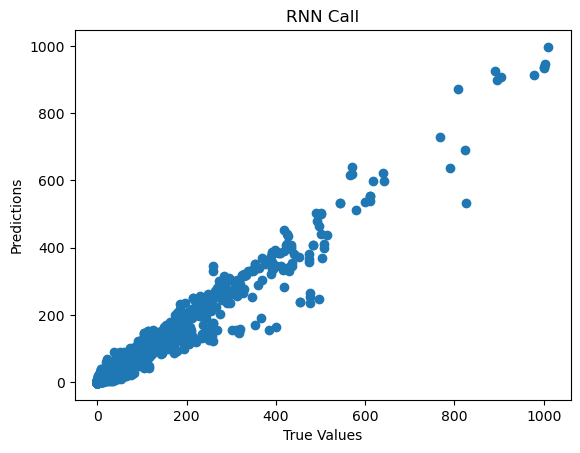

In [51]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Plot the true values against the predictions
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('RNN Call')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

# Load your data
# rnn_call_data = pd.read_csv('your_data.csv')  # Uncomment and modify this line to load your data

# Separate features and target
y = rnn_put_data['price']
X = rnn_put_data.drop('price', axis=1)

# Handle categorical data by one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Remove rows with NaN values
X.dropna(inplace=True)
y = y[X.index]  # Keep the target values corresponding to the filtered features

# Convert to more memory-efficient data types
X = X.astype(np.float32)
y = y.astype(np.float32)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection (optional, adjust k based on your needs)
k = 1000  # Number of top features to keep
selector = SelectKBest(f_regression, k=k)
X_selected = selector.fit_transform(X_scaled, y)

print(f"Data shape after feature selection: {X_selected.shape}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.20, random_state=0)

# Reshape the data to 3D format for LSTM (samples, timesteps, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [ ]:
# Build RNN model
RNN_put = Sequential()
RNN_put.add(LSTM(400, input_shape=(1, X_train_reshaped.shape[2]), activation='relu', return_sequences=True))
RNN_put.add(LSTM(400, activation='relu', return_sequences=True))
RNN_put.add(LSTM(400, activation='relu', return_sequences=True))
RNN_put.add(LSTM(400, activation='relu', return_sequences=True))
RNN_put.add(LSTM(400, activation='relu'))

# Compile the model with a lower learning rate and gradient clipping
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)
RNN_put.compile(loss='mean_squared_error', optimizer=optimizer)

# Train the RNN model
RNN_put.fit(X_train_reshaped, y_train, epochs=40, batch_size=16, verbose=1)

# Evaluate the model
loss = RNN_put.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss}")

In [8]:
RNN_put.save('models\\rnn\RNN_put.keras')

In [52]:
from keras.models import load_model

# Load the model
RNN_put = load_model('models\\rnn\\RNN_put.keras')

In [53]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

# Load your data
# rnn_call_data = pd.read_csv('your_data.csv')  # Uncomment and modify this line to load your data

# Separate features and target
y = rnn_put_data['price']
X = rnn_put_data.drop('price', axis=1)

# Handle categorical data by one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Remove rows with NaN values
X.dropna(inplace=True)
y = y[X.index]  # Keep the target values corresponding to the filtered features

# Convert to more memory-efficient data types
X = X.astype(np.float32)
y = y.astype(np.float32)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection (optional, adjust k based on your needs)
k = 1000  # Number of top features to keep
selector = SelectKBest(f_regression, k=k)
X_selected = selector.fit_transform(X_scaled, y)

print(f"Data shape after feature selection: {X_selected.shape}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.20, random_state=0)

# Reshape the data to 3D format for LSTM (samples, timesteps, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


Data shape after feature selection: (128952, 1000)


In [54]:
y_pred = RNN_put.predict(X_test_reshaped)

806/806 [==============================] - 7s 7ms/step


In [58]:
df = pd.DataFrame(y_test)
df['RNN'] = y_pred

In [59]:
df

,price,RNN
32471,1.590000,1.538507
94221,5.700000,5.741383
109276,2.300000,4.188641
233402,0.040000,0.532276
260240,2.500000,3.806092
...,...,...
64060,0.750000,0.783683
255350,0.100000,0.919719
84328,36.299999,27.594770
158612,23.000000,44.976936


In [60]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Assuming 'df' is your DataFrame and 'RNN' represents your predictions
# Calculate Mean Squared Error (MSE)
RNN_put_mse = mean_squared_error(df['price'], df['RNN'])

# Calculate Root Mean Squared Error (RMSE)
RNN_put_rmse = np.sqrt(RNN_put_mse)

# Calculate Mean Absolute Error (MAE)
RNN_put_mae = mean_absolute_error(df['price'], df['RNN'])

# Calculate Mean Absolute Percentage Error (MAPE)
RNN_put_mape = np.mean(np.abs((df['price'] - df['RNN']) / df['price'])) * 100

# Calculate R-squared
RNN_put_r_squared = r2_score(df['price'], df['RNN'])

print("Mean Squared Error (MSE):", RNN_put_mse)
print("Root Mean Squared Error (RMSE):", RNN_put_rmse)
print("Mean Absolute Error (MAE):", RNN_put_mae)
print("Mean Absolute Percentage Error (MAPE):", RNN_put_mape)
print("R-squared:", RNN_put_r_squared)


Mean Squared Error (MSE): 43.931824
Root Mean Squared Error (RMSE): 6.6281085
Mean Absolute Error (MAE): 2.0085592
Mean Absolute Percentage Error (MAPE): 430.90476989746094
R-squared: 0.9575766062323476


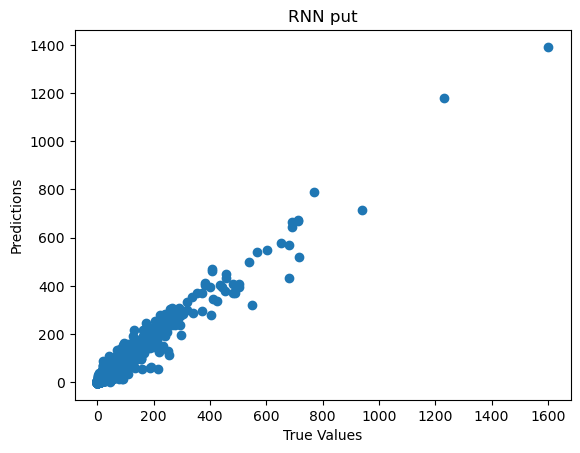

In [61]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Plot the true values against the predictions
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('RNN put')
plt.show()